# Generalized linear models
(Yleistetyt lineaariset mallit)

# 1. Johdanto
## 1.1 Tilastollisista malleista
Miksi mallitetaan? Halutaan tutkia $x$ (altiste, selittäjä, riippumaton muuttuja, syy) vaikutusta vasteeseen $y$ (selitettävä muuttuja, riippuva muuttuja, seuraus):


**Independent variable, Riippumaton muuttuja, Oberoende variabel**

**Dependent variable, Riippuva muuttuja, Beroende variabel**

* Koetulos ("vaste") $\mathbf{y}$, 
* koeolosuhteet (selittäjävektori) $\mathbf{x}_i$
* satunnaisuus ("virhetermi") $\epsilon$. 

$$
\mathbf{y} = \begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}, X = \begin{pmatrix}
1 & x_{12} & \dots & x_{1p} \\
1 & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{n2} & \dots & x_{np} \\
\end{pmatrix} = \begin{pmatrix}
\mathbf{x}_1^T \\ \mathbf{x}_2^T \\ \vdots \\ \mathbf{x}_n^T \\
\end{pmatrix}, \mathbf{\epsilon} = \begin{pmatrix}
\epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_2
\end{pmatrix}
$$

### Mallin valinta
All models are wrong, some are more usegul than others and we should seek those (McCullagh and Nelder 1989). 

Valitse malli, jonka matemaattinen muoto sopii mallinnettavaan vasteeseen. Esim. monet tutkijat ovat käyttäneet tavallista lineaarista regressiomallia mallittamaan binäärisiä (0/1) vasteita. Sellaisilla malleilla estimoidut todennäköisyydet voivat olla välin [0,1]ulkopuolella!

## Selittävien tekijöiden valinta


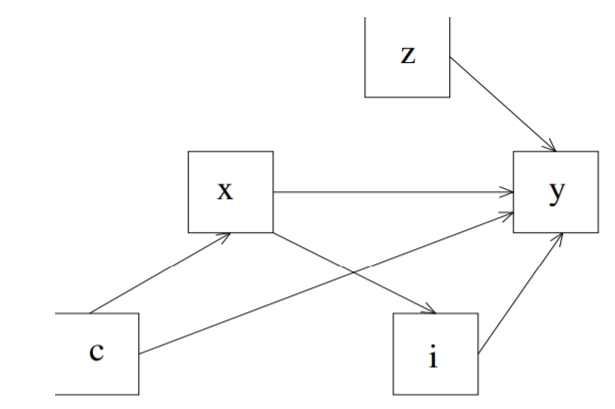

* **Confounder, Sekoittava tekijä, Snedvridande faktorer** (c)
* **Mediator, Väliintuleva tekijä, Mediator** (i)
* **Riippumaton syytekijä** (z)

* Jatkuva vaste: $y_i = h(\mathbf{x}_i) + \epsilon_i$, $i = 1, \dots, n$
* Dikotominen vaste: $y_i$ noudattaa Bernoullijakaumaa $Bin(1, p_i)$, jossa $p_i$ riippuu olosuhteista $x_i$: $p_i = h(\mathbf{x}_i), i=1; \dots, n$ $y_i$:t ovat riippumattomia.
* Lukumäärävaste: $y_i$ noudattaa Poissonjakaumaa $Poi(\lambda_i)$, jossa $\lambda_i$ riippuu olosuhteista $x_i$: $\lambda_i = h(\mathbf{x}_i), i=1, \dots, n$, $y_i$:t riippumattomia.
* Elinaikavaste: Elinaikaan $y_i$ liittyvä vaarafunktio (hazard): $h_i(y) = f_i(y)/(1-F_i(y))$ muotoa $h_i(y) = e^{h(\mathbf{x}_i)}h_0 (y)$

* Luokiteltu
    * Kaksiluokkainen (Bernoulli, binomi)
    * Usealuokkainen
        * Luokat järjestetty (multinomi)
        * Luokat eivät järjestetty (multinomi)
* Numeerinen
    * Lukumäärä (binomi, Poisson)
    * Jaktuva
        * Elinikä, Positiivinen (eksponentti, gamma, weibull)
        * Reaaliluku (Log. norm., normaali)

## 1.3 Yleistetyt lineaarisen mallin komponentit
Tavallinen lineaarinen regressiomalli, odotusarvon ja selittävien muuttujien välille oletetaan lineaarinen yhteys. Vastemuuttujan jakauma on normaalijakauma. 

Yleistetyt lineaariset mallit (YLM) yleistävät lineaarisen regressiomallin kattamaan myös ei-normaalisia vastejakaumia ja mahdollisesti epälineaarisia vasteen odotusarvon funktioita. 

* 1. Satunnaisosa: satunnaismuuttujat $y_i$ odotusarvoilla $\mu_i$ sekä mahdollisesti tuntemattomalla hajontaparametrilla $\sigma$
* 2. Systemaattinen osa


\section{Mallin sovitus ja päättely}
\subsection{Uskottavuus ja ML-estimaatti}
Halutaan tehdä päätelmiä, jotka koskevat tuntematonta parametrivektoria $\mathbf{\delta} = (\delta_1, \dots, \delta_k)^T$. Parametrin $\mathbf{\delta}$ mahdollisten arvojen muodostamaa joukkoa $\Omega \subset \R^k$ kutsutaan parametriavaruudeksi (parameter space). 

Tehdään koe, jonka tulos $\mathbf{y}$ sisältää parametria $\mathbf{\delta}$ koskevaa informaatiota. Koetulokseen $\mathbf{y}$ liittyvä todennäköisyys (tai tiheysfunktio)
\[
f_{\mathbf{Y}}(\mathbf{y}; \mathbf{\delta})
\]
riippuu (tunnetulla tavalla) parametrista $\mathbf{\delta}$. 

Havaittua koetulosta $\mathbf{y}$ vastaava uskottavuusfunktio
\[
L(\mathbf{\delta}) = L(\mathbf{\delta}; \mathbf{y}) = f_{\mathbf{Y}}(\mathbf{y}; \mathbf{\delta}), \mathbf{\delta} \in \Omega
\]
kertoo (karkeasti tulkiten) "todennäköisyyden, jolla $\mathbf{\delta}$ tuottaa nyt saadun havainnon $\mathbf{y}$". Logaritminen uskottavuusfunktio on
\[
l(\mathbf{\delta}) = l(\mathbf{delta}; \mathbf{y}) = l(\delta_1, \dots, \delta_k) = \log L(\mathbf{\delta})
\]

Suurimman uskottavuuden estimaatti (MLE)
\[
\hat{\mathbf{\delta}} = (\hat{\delta}_1, \dots, \hat{\delta}_k)^T, \in \Omega
\]
on se parametriarvojen muodostama vektori, joka maksimoi (logaritimisen) uskottavuusfunktion.

Edelleen pistemääräfunktio (core function) on vektoriarvoinen funktio $\mathbf{s}(\mathbf{\delta})$, jonka $j$:s komponentti on
\[
s_j(\mathbf{\delta}) = \frac{\partial}{\partial \delta_j}l(\mathbf{\delta}), j=1, \dots, k
\]
ja havaittu informaatio $\mathbf{J}(\mathbf{\delta})$ on matriisiarvoinen funktio. jonka $(r, s)$ -komponentti on
\[
j_{r,s}(\mathbf{\delta}) = - \frac{\partial^2}{\partial \delta_r \partial \delta_s}l(\mathbf{\delta})
\]
Fisherin informaatio $\mathbf{I}(\mathbf{\delta})$ saadaan ottamalla odotusarvot alkioittain matriisista $\mathbf{J}(\mathbf{\delta})$, ts. $\mathbf{I}(\mathbf{\delta})$ on matriisi, jonka (r, s)-komponentti on $i_{rs}(\mathbf{\delta}) = E(j_{rs}(\mathbf{\delta}; \mathbf{y}))$.

\subsubsection{Esim. Normaalijakauma}
Olkoon $y_1, \dots, y_n$ satunnaisotos normaalijakaumasta $N(\mu, \delta)$, $\mu$ ja $\delta > 0$ ovat tuntemattomia. Nyt
\[
l(\mu, \delta) = - \frac{n}{2} \log(2 \pi) - \frac{n}{2}\log(\delta) - \frac{1}{2 \delta} \sum_{i=1}^n (y_i - \mu)^2
\]
ja suurimman uskottavuuden estimaatti on
\[
\hat{\mu} = \overline{y}, \hat{\delta} = s^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \overline{y})^2
\]
Havaittu informaatiomatriisi on 
\[
\hat{\mathbf{J}} = \diag (\frac{n}{s^2}, \frac{n}{2(s^2)^2} ) = \begin{pmatrix}
\frac{n}{s^2} & 0 \\
0 & \frac{n}{2(s^2)^2}
\end{pmatrix}
\]

\subsection{ML-estimaatin laskeminen numeerisesti}
Suurimman uskottavuuden estimaatti (MLE) löytyy ratkaisemalla samanaikaisesti $k$ yhtälöä
\[
s_j(\mathbf{\delta}) = 0, j =1, \dots, k
\]
tai numeerisesti esim. Newtonin-Raphsonin menetelmän avulla. 

Tarkastellaan ensin yksiulotteista tapausta. Olkoon $l: \R \to \R$ ja halutaan estiä $l(\delta)$:n maksimikohta. Merkitään $s(\delta) = l'(\delta)$ ja $j(\delta) = - l''(\delta)$. Olkoon $\delta_{(k)}$ funktion $s(\delta)$ nollakohtaan liittyvä $k$:s arvaus. Silloin seuraava "parempi" arvaus muodostetaan säännöllä
\[
\delta_{k + 1} = \delta_{(k)} + \frac{s(\delta_{(k)})}{j(\delta_{(k)})}, k=0,1,2, \dots
\]

\subsection{Jakaumatuloksia}
Uskottavuusfunktio ja logaritminen uskottavuusfunktio ovat satunnaisia; niiden arvot vaihtelevat kokeesta toiseen. Edelleen luonnollisesti näistä satunnaisfunktioista johdettavat suureet, kuten suurimman uskottavuuden estimaattivektori ja Fisherin informaatiomatriisi, ovat satunnaismuuttujia, joiden jakauman yksikäsitteisesti määrää koetuloksen $\mathbf{y}$ jakauma. Suureiden jakaumat siis riippuvat tuntemattomasta parametrista $\mathbf{\delta} = (\delta_1, \dots, \delta_k)^T \in \Omega$.

Tarkastellaan satunnaisfunktioita $\mathbf{s}(\mathbf{\delta})$ ja $\mathbf{J}(\mathbf{\delta})$. Eräitten yleisten ehtojen vallitessa
\[
E_{\delta}(\mathbf{s}(\mathbf{\delta}; \mathbf{Y})) = 0, E_{\delta}(\mathbf{s}(\mathbf{\delta}; \mathbf{Y})\mathbf{s}^T(\mathbf{\delta}; \mathbf{Y})) = E_{\delta}(\mathbf{J}(\mathbf{\delta}; \mathbf{Y})) = \mathbf{I}(\mathbf{\delta})
\]

Olkoon $\mathbf{y} = (y_1, \dots, y_n)^T$ satunnaisotos jakaumasta, jonka tiheysfunktio tai todennäköisyysfunktio riippuu tuntemattomasta k-ulotteisesta parametrista
\[
\mathbf{\delta} = (\delta_1, \dots, \delta_k)^T
\]
Olkoon
\[
\hat{\mathbf{\delta}} = \hat{\mathbf{\delta}}(\mathbf{y}) = (\hat{\delta}_1, \dots, \hat{\delta}_k)^T
\]
koetulokseen $\mathbf{y}$ liittyvä suurimman uskottavuuden estimaattin ja $\hat{\mathbf{J}}$ suurimman uskottavuuden ratkaisuun liittyvä havaittu informaatio. Suurimman uskottavuuden estimaatti ei välttämättä ole harhaton (jolloin $E_{\delta}(\hat{\delta}) = \delta$ olipa $\delta$ mikä tahansa), mutta eräiden yleisten ehtojen vallitessa se on tarkentuva, ts. 


\subsection{Delta-menetelmä}

\subsection{Eksponentiaalinen perhe}
Oletetaan, että $y_i$:n tiheys- tai todennäköisyysfunktio on
\[
f(y_i; \delta_i, +phi) = \exp \bigg(\frac{y_i \delta_i - b(\delta_i)}{a(\phi)} + c(y_i, \phi) \bigg)
\]
Oletetaan, että $\phi$ on tunnettu. Silloin havaintoon $y_i$ liittyvä pisteluku- ja informaatiofunktio ($\delta_i$ tuntematon parametri) ovat
\[
\frac{y_i - b'(\delta_i)}{a(\phi)}, \frac{b''(\delta_i)}{a(\phi)}
\]
Koska
\[
E_{\delta}(s(\delta)) = 0, E_{\delta}(s(\delta)s^T(\delta)) = E_{\delta}(J(\delta))
\]
niin 
\[
E(y_i) = \mu_i = b'(\delta_i), Var(y_i) = \sigma_i^2 = b''(\delta_i)a(\phi)
\]
Olkoon nyt
\[
v_i = \mathbf{x}_i^T\mathbf{\beta}
\]
lineaarinen prediktori, $i = 1, \dots, n$. Havaintoaineistoon $y_i, \dots, y_n$ liittyvä pistelukufunktio $\beta_j$:n suhteen on
\[
\sum_{i=1}^n \bigg( \frac{y_i - \mu_i}{a(\phi)} \frac{\partial \delta_i}{\partial \mu_i} \frac{\partial \mu_i}{\partial v_i} x_{ij} \bigg)
\]
Linkkiä, jonka vallitessa $v_i = \delta_i$ tai $g(\mu_i) = \delta_i$ kutsutaan kanoniseksi linkiksi. Tällöin $\mathbf{X}^T\mathbf{y}$ on tyhjentävä tunnusluku $\mathbf{\beta}$:lle ja 
\[
\frac{\partial \delta_i}{\partial \mu_i}\frac{\partial \mu_i}{\partial v_i} = 1
\]
Jos 
\[
\Sigma = \diag(\sigma_i^2), D = \diag(\frac{\partial \mu_i}{\partial v_i})
\]
niin pisteluku- ja informaatiofunktio ovat
\[
\mathbf{s}(\mathbf{\beta}) = \mathbf{X}^T \mathbf{\Sigma}^{-1}\mathbf{D}(\mathbf{y} - \mathbf{\mu})
\]
\[
\mathbf{I}(\beta) = E(\mathbf{J}(\mathbf{\beta})) = \mathbf{X}^T \mathbf{\Sigma}^{-1}\mathbf{D}^2 \mathbf{X}
\]